### Load row image dataset for detection

In [2]:
from mxnet.gluon.data.vision import transforms, datasets
import cv2
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
train_dataset = datasets.ImageFolderDataset('../.mxnet/datasets/ITW_row/')

119141
Data type: <class 'numpy.uint8'>
Label: 0
Label description: cloudy


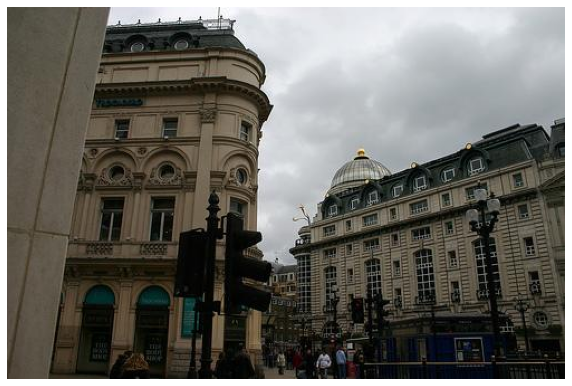

In [4]:
print(len(train_dataset))
sample_idx = 999
sample = train_dataset[sample_idx]
data = sample[0]
label = sample[1]

print("Data type: {}".format(data.dtype))
print("Label: {}".format(label))
print("Label description: {}".format(train_dataset.synsets[label]))

plt.figure(figsize=(10,10))
plt.imshow(data.asnumpy())
plt.axis("off")
plt.show()

### Load rec image dataset for detection

In [5]:
import os
from mxnet import nd
from mxnet.io import ImageRecordIter

In [6]:
rec_path = os.path.expanduser('~/.mxnet/datasets/ITW_rec/')

In [7]:
train_data = ImageRecordIter(
    path_imgrec = os.path.join(rec_path, 'train.rec'),
    path_imgidx = os.path.join(rec_path, 'train.idx'),
    data_shape  = (3, 416, 416),
    batch_size  = 32,
    shuffle     = True
)

for batch in train_data:
    print(batch.data[0].shape, batch.label[0].shape)
    break

(32, 3, 416, 416) (32,)


(3, 224, 224)


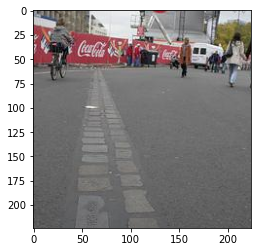

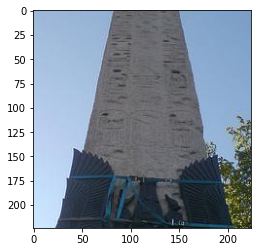

In [12]:
from gluoncv.utils import viz
val_data = ImageRecordIter(
    path_imgrec = os.path.join(rec_path, 'val.rec'),
    path_imgidx = os.path.join(rec_path, 'val.idx'),
    data_shape  = (3, 224, 224),
    batch_size  = 32,
    shuffle     = False
)
for batch in val_data:
    print(batch.data[0][31].shape)
    viz.plot_image(nd.transpose(batch.data[0][31], (1, 2, 0)))
    viz.plot_image(nd.transpose(batch.data[0][21], (1, 2, 0)))
    break

In [9]:
print(train_data.getdata().shape)

(32, 3, 416, 416)
